In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


num_of_episodes = 2000
learning_rate = 0.1
discount = .99
rList=[]

env = gym.make('FrozenLake-v0')

In [2]:
def show_play(env, sess):
    state = env.reset()
    env.render()
    
    while True:
        action = np.argmax(sess.run(Qpred, feed_dict={X:one_hot(state)}))
        state, reward, done, info = env.step(action)
        env.render()
        print("State: ", state, "Action: ", action,"Reward: ", reward, "Info: ", info)
        
        if done:
            break

In [3]:
size_in = env.observation_space.n
size_out = env.action_space.n

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

#W = tf.Variable(tf.get_variable("w", shape=[size_in, size_out], initializer=tf.contrib.layers.xavier_initializer()))
W = tf.Variable(tf.random_uniform([size_in, size_out], 0, 0.01))  # weight

Qpred = tf.matmul(X,W)
cost = tf.reduce_sum(tf.square(Y-Qpred))
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

def one_hot(x):
    return np.identity(16)[x:x + 1]

/home/psj8252/.local/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in divide


Success rate: 0.411


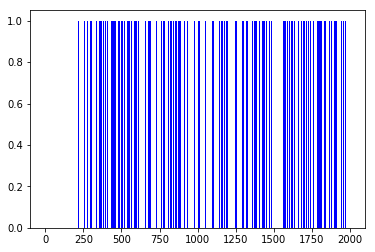


SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
('State: ', 1, 'Action: ', 2, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Up)
SFFF
FHFH
FFFH
HFFG
('State: ', 1, 'Action: ', 3, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Up)
SFFF
FHFH
FFFH
HFFG
('State: ', 2, 'Action: ', 3, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Left)
SFFF
FHFH
FFFH
HFFG
('State: ', 2, 'Action: ', 0, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Left)
SFFF
FHFH
FFFH
HFFG
('State: ', 2, 'Action: ', 0, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Left)
SFFF
FHFH
FFFH
HFFG
('State: ', 6, 'Action: ', 0, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Right)
SFFF
FHFH
FFFH
HFFG
('State: ', 2, 'Action: ', 2, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Left)
SFFF
FHFH
FFFH
HFFG
('State: ', 1, 'Action: ', 0, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Up)
SFFF
FHFH
FFFH
HFFG
('State: ', 0, 'Action: ',

In [4]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(num_of_episodes):

        s = env.reset()
        e = 1. / ((step / 50) + 10)
        rAll = 0
        done = False

        while not done:
            Qs = sess.run(Qpred, feed_dict={X:one_hot(s)})
            
            if np.random.rand(1) < e:
                a = env.action_space.sample()
            else:
                a = np.argmax(Qs)     
#            a = np.argmax(Qs + np.random.randn(1,env.action_space.n) / step+1)
            
            s1, reward, done, info = env.step(a)
            
            if done:
                Qs[0,a] = reward
            else:
                Qs1 = sess.run(Qpred, feed_dict={X:one_hot(s1)})
                Qs[0,a] = reward + discount * np.max(Qs1)
            
            sess.run(train, feed_dict={X:one_hot(s), Y:Qs})
            
            rAll += reward
            s = s1
        rList.append(rAll)
    print("Success rate: " + str(sum(rList) / num_of_episodes))
    plt.bar(range(len(rList)), rList, color="blue")
    plt.show()
    
    show_play(env, sess)